<a href="https://colab.research.google.com/github/derewor/Issue-Resolution-Patterns/blob/main/Slack_department_analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [88]:
# Mount and read the csv file.
df = pd.read_csv("/content/Updated_DataFrame_with_Flesch_Score.csv")

In [89]:
# visualize the top few rows.
df.head(2)

,parent_message_ts,ts,user_id,masked_text,converted_timestamp,Department,Flesch_Score
0,1.733927e+09,1.733927e+09,U081S3YCD2N,<@U081S3YCD2N> se ha unido al canal,2024-12-11 14:29:14.757239+00:00,NaN,59.75
1,1.730439e+09,1.730439e+09,U07UP96GXA5,<@U04B0MY6R7E> 本日分です。,2024-11-01 05:32:53.216949+00:00,NaN,77.91


## **Data cleaning**

In [90]:
# Count the number of null values in the columns.
df.isnull().sum()

,0
parent_message_ts,0
ts,0
user_id,1764
masked_text,555
converted_timestamp,0
Department,5217
Flesch_Score,5


In [91]:
# exclude all rows where the used_id and masked_text messages are null.
df1 = df.dropna(subset=['user_id','masked_text'])
print(df.shape)
print(df1.shape)

(16651, 7)
(14332, 7)


In [92]:
df1.isnull().sum()

,0
parent_message_ts,0
ts,0
user_id,0
masked_text,0
converted_timestamp,0
Department,3000
Flesch_Score,5


In [93]:
# Fill null values of Departments with unknown
df['Department'] = df['Department'].fillna('Unknown')

In [94]:
# calculate the number of messages sent by each department.
message_per_department = df.groupby('Department')['ts'].count()
# convert to daframe
message_per_department = pd.DataFrame(message_per_department).reset_index()
# calclate the average message per deparmtnet per user
message_per_department['average_message_per_user'] = message_per_department['ts']/df.user_id.nunique()
print(message_per_department)

                 Department    ts  average_message_per_user
0          Customer Success  3455                 18.475936
1                 Executive  2480                 13.262032
2  Finance & Administration     1                  0.005348
3         Marketing & Sales   436                  2.331551
4      Other / Unclassified   150                  0.802139
5    Others & Miscellaneous  2620                 14.010695
6          Product & Design   567                  3.032086
7                       R&D  1138                  6.085561
8      Support & Operations   587                  3.139037
9                   Unknown  5217                 27.898396


In [95]:
# count the number of users per deparment.
user_per_department = df.groupby('Department')['user_id'].nunique()
print(user_per_department)

Department
Customer Success             13
Executive                    12
Finance & Administration      1
Marketing & Sales             4
Other / Unclassified          4
Others & Miscellaneous        6
Product & Design              4
R&D                          15
Support & Operations          3
Unknown                     125
Name: user_id, dtype: int64


# **1. Customer Success Department**

In [96]:
# identify the users in CS deparmtnet
CS_users = df.query("Department == 'Customer Success'")
CS_users_unique = CS_users['user_id'].unique()
print(CS_users_unique)

['U087CL8P41X' 'U04CVQHC550' 'U02HGDV7SRH' 'U02HGDV9ZJ7' 'U036EUHUFQS'
 'U02G46UTNJ3' 'U02GQ1HESE6' 'U0361039L3F' 'U03PT8K5KEX' 'U05AXJANSH2'
 'U079QLGUP51' 'U07EZ6P6CPR' 'U07KG8USTV2']


In [97]:
# extract all messages posted by users whose user_id is with in CS_users_unique and messages the users tagged in masked_text.
CS_users = df[df['user_id'].isin(CS_users_unique)]
pattern = '|'.join(map(re.escape, CS_users_unique))
CS_tagged = df[df['masked_text'].str.contains(pattern, na=False)]
print(CS_users.shape, CS_tagged.shape)

(3455, 7) (2105, 7)


In [98]:
# extract and list all parent_message_ts from the CS_users df.
CS_users_pmts = CS_users['parent_message_ts'].unique()
CS_tagged_pmts = CS_tagged['parent_message_ts'].unique()
print(CS_users_pmts)
print(CS_tagged_pmts)

[1.73824868e+09 1.72805506e+09 1.72805520e+09 ... 1.73696040e+09
 1.72979686e+09 1.73879051e+09]
[1.73453842e+09 1.72778786e+09 1.73386054e+09 ... 1.73314998e+09
 1.73323047e+09 1.72806712e+09]


In [99]:
# Extract all messages associated with CS_users_pmts.
CS_users_df = df[df['parent_message_ts'].isin(CS_users_pmts)]
display(CS_users_df.head(3))

,parent_message_ts,ts,user_id,masked_text,converted_timestamp,Department,Flesch_Score
20,1.727788e+09,1.728310e+09,U07ADR34SAD,Hi <@U05AXJANSH2> - for the 2 SKU's mentioned ...,2024-10-07 14:11:02.627059+00:00,Unknown,58.42
21,1.728317e+09,1.728487e+09,U07KLKF0WTE,"Done with both of the table,",2024-10-09 15:22:59.872099+00:00,R&D,116.15
23,1.729275e+09,1.729514e+09,U052PCE5DUP,"Thanks <@U[NUMBER HIDDEN]HZQYH2>, please take ...",2024-10-21 12:41:05.358069+00:00,Product & Design,87.56


In [100]:
# Extract all messages associated with CS_users_pmts.
CS_tagged_df = df[df['parent_message_ts'].isin(CS_tagged_pmts)]
display(CS_tagged_df.head(3))

,parent_message_ts,ts,user_id,masked_text,converted_timestamp,Department,Flesch_Score
19,1.734538e+09,1.734538e+09,U078C5XRZKJ,<@U02G46UTNJ3> por favor tu ayuda nuevamente t...,2024-12-18 16:13:41.384359+00:00,Unknown,37.22
20,1.727788e+09,1.728310e+09,U07ADR34SAD,Hi <@U05AXJANSH2> - for the 2 SKU's mentioned ...,2024-10-07 14:11:02.627059+00:00,Unknown,58.42
21,1.728317e+09,1.728487e+09,U07KLKF0WTE,"Done with both of the table,",2024-10-09 15:22:59.872099+00:00,R&D,116.15


In [101]:
# add a mention column that indicates the tagged user in the masked_text field of CS_tagged_df.
CS_tagged_df['mention'] = CS_tagged_df['masked_text'].str.extract(f'({pattern})')
display(CS_tagged_df.tail(3))

<ipython-input-101-c2cd6ff9b6e5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CS_tagged_df['mention'] = CS_tagged_df['masked_text'].str.extract(f'({pattern})')


,parent_message_ts,ts,user_id,masked_text,converted_timestamp,Department,Flesch_Score,mention
16339,1.737400e+09,1.738706e+09,U07LX5S28BC,I will check again all the files and upload as...,2025-02-04 21:59:48.800489+00:00,Executive,88.00,NaN
16340,1.737553e+09,1.737621e+09,U07LX5S28BC,In meeting will call you after,2025-01-23 08:34:38.051419+00:00,Executive,87.95,NaN
16448,1.728067e+09,1.728067e+09,U07QHRP8A2Y,"• sacar los skus de las bolsas, <@U04CVQHC550>...",2024-10-04 18:38:41.204219+00:00,Unknown,63.70,U04CVQHC550


### **Message sent overall / per user**

In [102]:
# count the number of messages per user from customer success department
message_per_user = CS_users.groupby('user_id')['ts'].count()
# order it descendingly per count.
message_per_user = message_per_user.sort_values(ascending=False)
display(message_per_user.head(13).reset_index())

,user_id,ts
0,U07EZ6P6CPR,754
1,U07KG8USTV2,753
2,U0361039L3F,575
3,U079QLGUP51,408
4,U05AXJANSH2,310
5,U03PT8K5KEX,291
6,U02GQ1HESE6,188
7,U02G46UTNJ3,94
8,U087CL8P41X,36
9,U04CVQHC550,23


**Findings in Customer success department:**

**User count 13**

**Total messages sent: 3455**

**Highest number of message sent by user U07EZ6P6CPR**

In [148]:
message_per_user.to_csv('message_per_user.csv')

### **Total number of mentions per user of the CS Department.**

In [103]:
# count the number of message per mention.
message_per_mention = CS_tagged_df.groupby('mention')['ts'].count()
# convert to dataframe
message_per_mention = pd.DataFrame(message_per_mention).reset_index()
message_per_mention.sort_values(by='ts', ascending=False, inplace=True, ignore_index=True)
message_per_mention

,mention,ts
0,U07KG8USTV2,470
1,U07EZ6P6CPR,467
2,U079QLGUP51,331
3,U03PT8K5KEX,249
4,U05AXJANSH2,207
5,U02GQ1HESE6,160
6,U02G46UTNJ3,121
7,U087CL8P41X,36
8,U04CVQHC550,35
9,U02HGDV9ZJ7,23


In [149]:
message_per_mention.to_csv('message_per_mention.csv')

In [104]:
# merge message_per_user and message_per_mention df.
message_per_user_mention = pd.merge(message_per_user, message_per_mention, left_on='user_id', right_on='mention', how='left')
message_per_user_mention

,ts_x,mention,ts_y
0,754,U07EZ6P6CPR,467.0
1,753,U07KG8USTV2,470.0
2,575,NaN,NaN
3,408,U079QLGUP51,331.0
4,310,U05AXJANSH2,207.0
5,291,U03PT8K5KEX,249.0
6,188,U02GQ1HESE6,160.0
7,94,U02G46UTNJ3,121.0
8,36,U087CL8P41X,36.0
9,23,U04CVQHC550,35.0


### **Threads Participated In /oveall + per user**

In [105]:
# Count the number of parent messages Customer Success department invovled in.
parent_message_CSdepartment = CS_users.parent_message_ts.nunique()
print(parent_message_CSdepartment)

1607


In [106]:
# Number of parent messages each department sent in slack.
count_parent_department = df.groupby('Department')['parent_message_ts'].nunique()
# convert to dataframe
count_parent_department = pd.DataFrame(count_parent_department).reset_index()
# Calculate the percentage
count_parent_department['percentage'] = (count_parent_department['parent_message_ts']/count_parent_department['parent_message_ts'].sum())*100
print(count_parent_department)

                 Department  parent_message_ts  percentage
0          Customer Success               1607   16.760534
1                 Executive               1237   12.901544
2  Finance & Administration                  1    0.010430
3         Marketing & Sales                225    2.346683
4      Other / Unclassified                104    1.084689
5    Others & Miscellaneous               1434   14.956195
6          Product & Design                271    2.826450
7                       R&D                600    6.257822
8      Support & Operations                404    4.213600
9                   Unknown               3705   38.642053


In [107]:
# Calculate the proportion of messages per user from customer success department
message_per_CSuser = CS_users.groupby('user_id')['ts'].count()
message_per_CSuser = pd.DataFrame(message_per_CSuser).reset_index()
message_per_CSuser['proportion'] = message_per_CSuser['ts']/df.shape[0] * 100
# order it descendingly per count.
message_per_CSuser = message_per_CSuser.sort_values(by = 'ts', ascending=False)
print(message_per_CSuser)

        user_id   ts  proportion
10  U07EZ6P6CPR  754    4.528257
11  U07KG8USTV2  753    4.522251
4   U0361039L3F  575    3.453246
9   U079QLGUP51  408    2.450303
8   U05AXJANSH2  310    1.861750
6   U03PT8K5KEX  291    1.747643
1   U02GQ1HESE6  188    1.129061
0   U02G46UTNJ3   94    0.564531
12  U087CL8P41X   36    0.216203
7   U04CVQHC550   23    0.138130
3   U02HGDV9ZJ7   19    0.114107
2   U02HGDV7SRH    3    0.018017
5   U036EUHUFQS    1    0.006006


In [108]:
# calculate the number of messages sent by each department.
message_proportion_department = df.groupby('Department')['ts'].count() / df.shape[0] * 100
print(message_proportion_department)

Department
Customer Success            20.749505
Executive                   14.894000
Finance & Administration     0.006006
Marketing & Sales            2.618461
Other / Unclassified         0.900847
Others & Miscellaneous      15.734791
Product & Design             3.405201
R&D                          6.834424
Support & Operations         3.525314
Unknown                     31.331452
Name: ts, dtype: float64


In [109]:
# the proportion of message sent by each department.
message_departmentwise = df.groupby('Department')['ts'].count()
message_proportion = (message_departmentwise / message_departmentwise.sum())*100
result = pd.DataFrame({'Message Count': message_departmentwise, 'Proportion': message_proportion})
print(result)

                          Message Count  Proportion
Department                                         
Customer Success                   3455   20.749505
Executive                          2480   14.894000
Finance & Administration              1    0.006006
Marketing & Sales                   436    2.618461
Other / Unclassified                150    0.900847
Others & Miscellaneous             2620   15.734791
Product & Design                    567    3.405201
R&D                                1138    6.834424
Support & Operations                587    3.525314
Unknown                            5217   31.331452


### **Avg. response time (min)**

In [154]:
# convert the ts in CS_tagged_df to datetime stamp.
CS_users_df['converted_timestamp'] = pd.to_datetime(CS_users_df['converted_timestamp'])
CS_users_df = CS_users_df.sort_values(by=['converted_timestamp'])

In [155]:
# Calculate lag time (difference between current and previous message per user)
CS_users_df['lag_time_hrs'] = CS_users_df.groupby(['parent_message_ts'])['converted_timestamp'].diff().dt.total_seconds() / 3600
print(CS_users_df[['parent_message_ts', 'lag_time_hrs']].sort_values(by='parent_message_ts').head())

       parent_message_ts  lag_time_hrs
8630        1.716416e+09      0.543069
8465        1.716416e+09           NaN
8570        1.716416e+09     15.463017
13379       1.716416e+09      0.125787
13493       1.716416e+09      2.379180


In [161]:
# caclulate the average response time per department
average_response_time_CS = CS_users_df.groupby('Department')['lag_time_hrs'].agg(['mean','median','count'])
print(average_response_time_CS)

                             mean    median  count
Department                                        
Customer Success        20.567609  1.301449   2268
Executive                9.182277  0.440793   1202
Marketing & Sales        8.148819  0.516838     78
Other / Unclassified     3.721060  1.108871     24
Others & Miscellaneous  13.233276  0.738004   1017
Product & Design         7.779202  0.351802    352
R&D                     10.298274  0.461324    495
Support & Operations     4.447254  0.277204      9
Unknown                  8.970508  0.469434    660


In [160]:
# caclulate the average response time per parent message
average_response_time = CS_users_df.groupby('parent_message_ts')['lag_time_hrs'].mean().round(2)
print(average_response_time.head())

parent_message_ts
1.716416e+09     4.63
1.716906e+09    37.16
1.720205e+09      NaN
1.721912e+09     3.80
1.722355e+09    12.56
Name: lag_time_hrs, dtype: float64


In [162]:
# Calculate the average response time per parent message per user
avg_response_time_per_CSuser = CS_users_df.groupby(['parent_message_ts','user_id'])['lag_time_hrs'].median().round(3)
# change it to dataframe
avg_response_time_per_CSuser = pd.DataFrame(avg_response_time_per_CSuser).reset_index()
print(avg_response_time_per_CSuser.head())

   parent_message_ts      user_id  lag_time_hrs
0       1.716416e+09  U05AXJANSH2         8.003
1       1.716416e+09  U07EZ6P6CPR         1.252
2       1.716906e+09  U02HGDV9ZJ7        37.155
3       1.716906e+09  U06CM7UTA81           NaN
4       1.720205e+09  U087CL8P41X           NaN


In [163]:
# Calculate average response time per user
avg_response_time_per_CSuser = CS_users_df.groupby(['user_id'])['lag_time_hrs'].median().round(3)
# change it to dataframe
avg_response_time_per_CSuser = pd.DataFrame(avg_response_time_per_CSuser).reset_index()
print(avg_response_time_per_CSuser.sort_values(by='lag_time_hrs', ascending=False))

        user_id  lag_time_hrs
89  U07SJRL12EP        57.149
93  U085VRYNSCT        38.461
2   U02GP8V904T        36.028
8   U02HGDV7SRH        22.744
9   U02HGDV9ZJ7        15.901
..          ...           ...
76  U07JTPKFW7J           NaN
77  U07K8UE5U00           NaN
82  U07Q2LSBFTQ           NaN
90  U081S3YCD2N           NaN
91  U083AJRBJ31           NaN

[100 rows x 2 columns]


### **Calculate the average response time of the mentioned users in the customer department.**  

In [164]:
# convert the ts in CS_tagged_df to datetime stamp.
CS_tagged_df['converted_timestamp'] = pd.to_datetime(CS_tagged_df['converted_timestamp'])
CS_tagged_df = CS_tagged_df.sort_values(by=['converted_timestamp'])

In [165]:
# calculate the lag_time in the message_per_mention df.
CS_tagged_df['lag_time_hrs'] = CS_tagged_df.groupby(['parent_message_ts'])['converted_timestamp'].diff().dt.total_seconds() / 3600
CS_tagged_df.head(3)

,parent_message_ts,ts,user_id,masked_text,converted_timestamp,Department,Flesch_Score,mention,lag_time_hrs
11254,1.727121e+09,1.727757e+09,U06CM7UTA81,I don't think Bar has all she needs based on h...,2024-10-01 04:31:34.883829+00:00,Executive,95.42,NaN,NaN
11079,1.716906e+09,1.727769e+09,U06CM7UTA81,thanks <@U031E2LJJET>,2024-10-01 07:48:44.695199+00:00,Executive,35.61,NaN,NaN
10228,1.727121e+09,1.727771e+09,U06C4BHN2FL,<@U07EZ6P6CPR> where are the examples?,2024-10-01 08:15:11.410319+00:00,Others & Miscellaneous,66.40,U07EZ6P6CPR,3.726813


In [127]:
# calculate the average response time to mentions in message_per_mention df.
avg_response_time_per_mention = CS_tagged_df.groupby('mention')['lag_time_hrs'].agg(['mean','max','min','count']).round(2)
# convert to dataframe
avg_response_time_per_mention = pd.DataFrame(avg_response_time_per_mention).reset_index()
avg_response_time_per_mention = pd.DataFrame(avg_response_time_per_mention).reset_index()
avg_response_time_per_mention.sort_values(by='mean', ascending=False, inplace=True, ignore_index=True)
avg_response_time_per_mention

,index,mention,mean,max,min,count
0,0,U02G46UTNJ3,37.26,1350.32,0.01,46
1,1,U02GQ1HESE6,25.66,332.42,0.00,95
2,7,U05AXJANSH2,19.07,202.62,0.01,161
3,5,U03PT8K5KEX,18.06,451.50,0.00,112
4,10,U07KG8USTV2,17.32,714.31,0.00,361
5,8,U079QLGUP51,15.64,771.69,0.00,158
6,9,U07EZ6P6CPR,13.06,714.41,0.00,362
7,11,U087CL8P41X,7.27,35.09,0.01,8
8,4,U036EUHUFQS,7.23,13.42,0.16,3
9,6,U04CVQHC550,6.56,20.64,0.04,9


In [166]:
avg_response_time_per_mention.to_csv('avg_response_time_per_mention.csv')

### **Avg. threads in convo's /oveall + per user**

In [167]:
#Avg. threads in conversations /oveall + per user
Average_threads_per_CSuser = CS_users.groupby('parent_message_ts')['user_id'].count().mean()
Average_threads_per_CSuser

np.float64(2.149968886123211)

In [168]:
threads_per_CSuser_per_message = CS_users.groupby(['user_id', 'parent_message_ts'])['parent_message_ts'].count()

# Group by 'parent_message_ts' to calculate the average number of threads each user has used per parent message
average_threads_per_CSuser_per_message = threads_per_CSuser_per_message.groupby('user_id').mean()
print(average_threads_per_CSuser_per_message)

user_id
U02G46UTNJ3    1.287671
U02GQ1HESE6    1.446154
U02HGDV7SRH    1.500000
U02HGDV9ZJ7    1.000000
U0361039L3F    1.726727
U036EUHUFQS    1.000000
U03PT8K5KEX    1.865385
U04CVQHC550    1.210526
U05AXJANSH2    2.152778
U079QLGUP51    1.773913
U07EZ6P6CPR    2.530201
U07KG8USTV2    2.896154
U087CL8P41X    1.200000
Name: parent_message_ts, dtype: float64


### **Response Time Trend**

In [170]:
# Define the function to categorize response times
def categorize_response_time(hours):
    if pd.isna(hours):
        return "No Response"
    elif hours <= 1:
        return "Fast & Responsive"
    elif hours <= 2:
        return "Measured & Thoughtful"
    elif hours <= 4:
        return "Deliberate & Reflective"
    else:
        return "Late response"

# Apply the categorization function to the 'lag_time' column
CS_users_df['response_category'] = CS_users_df['lag_time_hrs'].apply(categorize_response_time)
CS_users_df.groupby('user_id')['response_category'].value_counts().unstack(fill_value=0)
print(CS_users_df[['parent_message_ts','user_id', 'lag_time_hrs', 'response_category']].head(10))


       parent_message_ts      user_id  lag_time_hrs        response_category
11254       1.727121e+09  U06CM7UTA81           NaN              No Response
11079       1.716906e+09  U06CM7UTA81           NaN              No Response
424         1.727127e+09  U052PCE5DUP           NaN              No Response
10228       1.727121e+09  U06C4BHN2FL      3.726813  Deliberate & Reflective
8464        1.727771e+09  U05AXJANSH2           NaN              No Response
8508        1.727773e+09  U05AXJANSH2           NaN              No Response
4292        1.727773e+09  U02MRFDTE92      0.200925        Fast & Responsive
8493        1.727773e+09  U05AXJANSH2      0.124071        Fast & Responsive
8577        1.727774e+09  U05AXJANSH2           NaN              No Response
11450       1.727776e+09  U06CM7UTA81           NaN              No Response


In [171]:
# count the number of parent threads per response category.
parent_thread_response_category = CS_users_df.groupby('response_category')['parent_message_ts'].nunique()
# convert to dataframe
parent_thread_response_category = pd.DataFrame(parent_thread_response_category).reset_index()
parent_thread_response_category['percentage'] = (parent_thread_response_category['parent_message_ts']/parent_thread_response_category['parent_message_ts'].sum())*100
print(parent_thread_response_category)

         response_category  parent_message_ts  percentage
0  Deliberate & Reflective                280    7.685973
1        Fast & Responsive                737   20.230579
2            Late response                690   18.940434
3    Measured & Thoughtful                329    9.031018
4              No Response               1607   44.111996


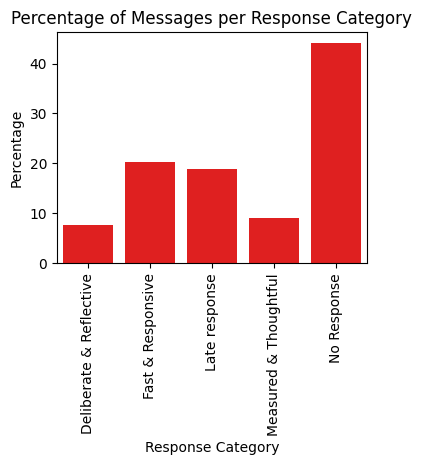

In [172]:
# plot the parent_thread_response_category with seaborn.
plt.figure(figsize=(4, 3))  # Set the figure size
sns.barplot(x='response_category', y='percentage', data=parent_thread_response_category, color='red')
plt.xlabel('Response Category')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Percentage of Messages per Response Category')
plt.show()

### **Flesch Score**

In [173]:
# determine the max and min of the flesh score
print(CS_users_df.Flesch_Score.max())
print(CS_users_df.Flesch_Score.min())

121.22
-386.38


<Axes: xlabel='Flesch_Score', ylabel='Count'>

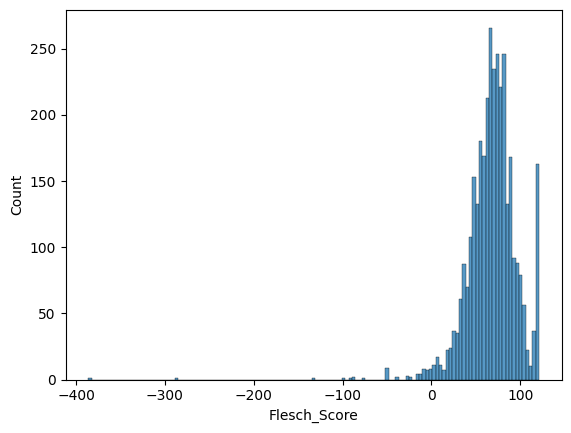

In [174]:
# determine the distribution of the flesh score using histplot.
sns.histplot(CS_users.Flesch_Score)

In [142]:
# # filiter message with flesh score greater that -25.
# customer_success_df_filtered = customer_success_df[customer_success_df['flesch_score'] >= -25]
# sns.histplot(customer_success_df_filtered.flesch_score)

In [177]:
# define the flesh score category based on percentile.
percentile_25 = CS_users_df.Flesch_Score.quantile(0.25)
percentile_50 = CS_users_df.Flesch_Score.quantile(0.50)
percentile_70 = CS_users_df.Flesch_Score.quantile(0.70)
percentile_90 = CS_users_df.Flesch_Score.quantile(0.90)

def flesch_score_category(flesch_score):
    if flesch_score >= percentile_90:
        return "Very Easy"
    elif flesch_score >= percentile_70 and flesch_score < percentile_90:
        return "Easy"
    elif flesch_score >= percentile_50 and flesch_score < percentile_70:
        return "Standard"
    elif flesch_score >= percentile_25 and flesch_score < percentile_50:
        return "Difficult"
    else:
        return "Very Difficult"

# Apply the categorization function to the 'flesch_score' column (not 'lag_time')
CS_users_df['flesch_score_category'] = CS_users_df['Flesch_Score'].apply(flesch_score_category)

# Group by user_id and count occurrences of each category
CS_users_df.groupby('user_id')['flesch_score_category'].value_counts().unstack(fill_value=0)

flesch_score_category,Difficult,Easy,Standard,Very Difficult,Very Easy
user_id,,,,,
U02G46UTNJ3,24,20,14,33,3
U02GJM64YSX,1,0,2,2,0
U02GP8V904T,0,0,1,0,0
U02GQ1HESE6,54,38,28,62,6
U02GYQDUCTT,0,5,6,0,0
...,...,...,...,...,...
U087CLBLD3K,3,2,1,4,2
U089FM421D2,1,0,0,3,0
U08A20CE6F2,0,0,0,5,0


In [178]:
# count the number of messsages per flesh score category.
flesch_score_category = CS_users_df.groupby('flesch_score_category')['ts'].count()
# convert to dataframe
flesch_score_category = pd.DataFrame(flesch_score_category).reset_index()
flesch_score_category['percentage'] = (flesch_score_category['ts']/flesch_score_category['ts'].sum())*100
print(flesch_score_category)

  flesch_score_category    ts  percentage
0             Difficult  1927   24.987033
1                  Easy  1558   20.202282
2              Standard  1511   19.592842
3        Very Difficult  1929   25.012967
4             Very Easy   787   10.204876


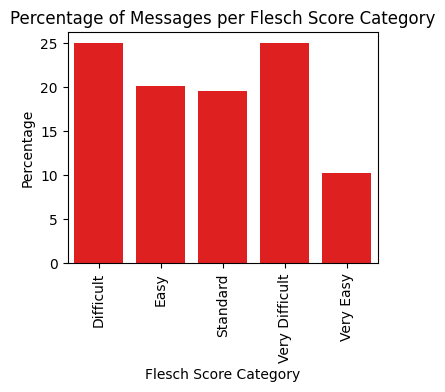

In [179]:
# plot the flesh_score_category with seaborn.
plt.figure(figsize=(4, 3))
sns.barplot(x='flesch_score_category', y='percentage', data=flesch_score_category, color='red')
plt.xlabel('Flesch Score Category')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Percentage of Messages per Flesch Score Category')
plt.show()


## **Nearly 50% of the message sent by the department fall within a difficult and very difficult to read/understant messages.**